# load dataset

In [17]:
import pandas as pd
import re
import nltk
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'spacy'

In [ ]:
data1 = pd.read_csv('mail_data.csv', encoding='latin-1')
data2 = pd.read_csv('Phishing_Email.csv', encoding='utf-8', on_bad_lines='skip', engine='python')


In [ ]:
data1

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data2.drop(['Unnamed: 0'], axis =1)

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
20693,date a lonely housewife always wanted to date ...,Phishing Email
20694,request submitted : access request for anita ....,Safe Email
20695,"re : important - prc mtg hi dorn & john , as y...",Safe Email
20696,press clippings - letter on californian utilit...,Safe Email


Drop duplicated

In [ ]:
data1.duplicated().sum()
data1.drop_duplicates(inplace=True)
data1.duplicated().sum()

data2.duplicated().sum()
data2.drop_duplicates(inplace=True)
data2.duplicated().sum()

0

# pre-processing

In [ ]:
import re

def preprocessing(msg):
    if not isinstance(msg, str):
        msg = str(msg)
    msg = clean_text(msg)
    msg = remove_special_characters(msg)
    msg = remove_numbers(msg)
    msg = remove_extra_spaces(msg)
    msg = remove_short_text(msg)
    msg = remove_emojis(msg)
    return msg

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_short_text(text, min_length=10):
    return text if len(text) >= min_length else ''

def remove_emojis(text):
    emoji_pattern = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data1['Message'] = data1['Message'].apply(preprocessing)
data1 = data1[data1['Message'] != '']

data2['Email Text'] = data2['Email Text'].apply(preprocessing)
data2 = data2[data2['Email Text'] != '']


In [ ]:
data1['Spam'] = data1['Category'].map({'spam': 1, 'ham': 0})
data1.drop(['Category'],axis = 1)

<ipython-input-150-2d2c8277abed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Spam'] = data1['Category'].map({'spam': 1, 'ham': 0})


,Message,Spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0
...,...,...
5567,this is the nd time we have tried contact u u ...,1
5568,will b going to esplanade fr home,0
5569,pity was in mood for that soany other suggestions,0
5570,the guy did some bitching but i acted like id ...,0


In [ ]:
data2['Phishing'] = data2['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0}).fillna(-1)
data2 = data2[['Email Text', 'Phishing']]
data2

<ipython-input-151-c4adf4b108a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Phishing'] = data2['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0}).fillna(-1)


,Email Text,Phishing
0,re disc uniformitarianism re sex lang dick hud...,0.0
1,the other side of galicismos galicismo is a sp...,0.0
2,re equistar deal tickets are you still availab...,0.0
3,hello i am your hot lil horny toy i am the one...,1.0
4,software at incredibly low prices lower draper...,1.0
...,...,...
20692,rick moen a crit im confused i thought it was ...,0.0
20693,date a lonely housewife always wanted to date ...,1.0
20694,request submitted access request for anita dup...,0.0
20695,re important prc mtg hi dorn john as you disco...,0.0


stopword

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

slang_dict = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "2": "to",
    "4": "for",
    "pls": "please",
    "plz": "please",
    "wif": "with",
    "dun": "don't",
    "wat": "what",
    "lar": "lah",
    "oni": "only",
    "tkts": "tickets",
    "n": "and",
    "c": "see",
    "b4": "before",
    "msg": "message",
    "txt": "text",
    "wkly": "weekly",
    "comp": "competition",
    "fa": "football association",
    "lil" : "little",
    "disc": "discount",

}


def process2_text(text, slang_dict):
    def replace_slang(text, slang_dict):
        words = text.split()
        replaced = [slang_dict.get(word, word) for word in words]  # Ganti slang jika ada di kamus
        return ' '.join(replaced)

    def remove_stopwords(text):
        words = text.split()
        filtered = [word for word in words if word not in stop_words]  # Hapus stopwords
        return ' '.join(filtered)

    def lemmatize_text(text):
        words = text.split()
        lemmatized = [lemmatizer.lemmatize(word) for word in words]  # Lemmatizing
        return ' '.join(lemmatized)

    # Pipeline pembersihan teks
    text = clean_text(text)
    text = replace_slang(text, slang_dict)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

data1['Message'] = data1['Message'].apply(lambda x: process2_text(str(x), slang_dict))

data2['Message'] = data2['Email Text'].apply(lambda x: process2_text(str(x), slang_dict))
# data2[['Message']].head()
data1[['Message']].head()


<ipython-input-153-720646bc3297>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Message'] = data1['Message'].apply(lambda x: process2_text(str(x), slang_dict))


,Message
0,go jurong point crazy available bugis great wo...
1,ok lah joking
2,free entry weekly competition win football ass...
3,say early hor see already say
4,nah dont think go usf life around though


In [ ]:
data2 = data2[['Message', 'Phishing']]
data2

,Message,Phishing
0,discount uniformitarianism sex lang dick hudso...,0.0
1,side galicismos galicismo spanish term name im...,0.0
2,equistar deal ticket still available assist ro...,0.0
3,hello hot little horny toy one dream open mind...,1.0
4,software incredibly low price lower drapery se...,1.0
...,...,...
20692,rick moen crit im confused thought gpled money...,0.0
20693,date lonely housewife always wanted date lonel...,1.0
20694,request submitted access request anita dupont ...,0.0
20695,important prc mtg hi dorn john discovered rece...,0.0


In [ ]:
data1 = data1[['Message', 'Spam']]
data1

,Message,Spam
0,go jurong point crazy available bugis great wo...,0
1,ok lah joking,0
2,free entry weekly competition win football ass...,1
3,say early hor see already say,0
4,nah dont think go usf life around though,0
...,...,...
5567,nd time tried contact pound prize claim easy c...,1
5568,b going esplanade fr home,0
5569,pity mood soany suggestion,0
5570,guy bitching acted like id interested buying s...,0


In [ ]:
d1 = data1
d1.to_csv('Spam after preprocessing.csv', index=False)

In [ ]:
d2 = data2
d2.to_csv('Phising after prprocesiing.csv', index=False)

# EDA spam

In [ ]:
spam_messages = d1[d1['Spam'] == 1]['Message']
ham_messages = d1[d1['Spam'] == 0]['Message']
print("Jumlah pesan spam:", len(spam_messages))
print("Jumlah pesan ham:", len(ham_messages))

Jumlah pesan spam: 639
Jumlah pesan ham: 4471


In [ ]:
import pandas as pd
from sklearn.utils import resample

data_spam = d1[d1['Spam'] == 1]
data_ham = d1[d1['Spam'] == 0]

jumlah_data_spam = len(data_spam)

data_ham_under = resample(data_ham,
                          replace=False,
                          n_samples=jumlah_data_spam,
                          random_state=42)

d1_undersampled = pd.concat([data_spam, data_ham_under], ignore_index=True)

d1_undersampled = d1_undersampled.dropna(subset=['Message'])
d1_undersampled = d1_undersampled[d1_undersampled['Message'] != '']

print("Jumlah data sebelum undersampling:", len(d1))
print("Jumlah data setelah undersampling:", len(d1_undersampled))
print("Jumlah data Spam:", len(d1_undersampled[d1_undersampled['Spam'] == 1]))
print("Jumlah data Ham:", len(d1_undersampled[d1_undersampled['Spam'] == 0]))

print(d1_undersampled[['Message', 'Spam']])


Jumlah data sebelum undersampling: 5110
Jumlah data setelah undersampling: 1277
Jumlah data Spam: 639
Jumlah data Ham: 638
                                                Message  Spam
0     free entry weekly competition win football ass...     1
1     freemsg hey darling week word back id like fun...     1
2     winner valued network customer selected receiv...     1
3     mobile month entitled update latest colour mob...     1
4     six chance win cash pound text csh send cost p...     1
...                                                 ...   ...
1273                                 shes drinkin im ok     0
1274                                 gokila talking aha     0
1275              ooooooh forgot tell get yoville phone     0
1276                               home watching tv lor     0
1277                        bookedthe hut also time way     0

[1277 rows x 2 columns]


# modeling using BoW

membuat kosa kata

In [ ]:
d1_undersampled['Spam'].value_counts()

,count
Spam,
1,639
0,638


In [ ]:
import random
import random
d1_undersampled_shuffled = d1_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Tentukan indeks untuk split
split_index = int(0.8 * len(d1_undersampled_shuffled))

# Split dataset menjadi train dan test
trainih= d1_undersampled_shuffled.iloc[:split_index]
testnih = d1_undersampled_shuffled.iloc[split_index:]
print("Jumlah data train:", len(trainih))
print("Jumlah data test:", len(testnih))


Jumlah data train: 1021
Jumlah data test: 256


pemisahan spam dan ham

In [ ]:
spam_messages = d1_undersampled_shuffled[d1_undersampled_shuffled['Spam'] == 1]['Message']
ham_messages = d1_undersampled_shuffled[d1_undersampled_shuffled['Spam'] == 0]['Message']
print("Jumlah pesan spam:", len(spam_messages))
print("Jumlah pesan ham:", len(ham_messages))

Jumlah pesan spam: 639
Jumlah pesan ham: 638


frekuensi kata

In [ ]:
from collections import defaultdict
ham_word_counts = defaultdict(int)
spam_word_counts = defaultdict(int)

total_spam_words = 0
total_ham_words = 0

for message in spam_messages:
    for word in message.split():
        spam_word_counts[word] += 1
        total_spam_words += 1

for message in ham_messages:
    for word in message.split():
        ham_word_counts[word] += 1
        total_ham_words += 1
print("Kata dalam Spam:", dict(spam_word_counts))
print("Kata dalam Ham:", dict(ham_word_counts))
print("Total Kata Spam:", total_spam_words)
print("Total Kata Ham:", total_ham_words)

Kata dalam Spam: {'welcome': 8, 'please': 57, 'reply': 95, 'age': 14, 'gender': 2, 'begin': 1, 'eg': 11, 'cashbalance': 7, 'currently': 9, 'pound': 20, 'maximize': 7, 'cashin': 7, 'send': 57, 'cash': 50, 'pmsg': 13, 'cc': 6, 'hgsuitelands': 6, 'rowwjhl': 6, 'sm': 22, 'ac': 4, 'blind': 2, 'date': 10, 'rodds': 1, 'aberdeen': 1, 'united': 1, 'kingdom': 1, 'check': 4, 'httpimg': 1, 'acwicmbcktzr': 1, 'hide': 1, 'claire': 2, 'havin': 1, 'borin': 1, 'time': 18, 'alone': 3, 'wanna': 10, 'cum': 4, 'nite': 4, 'chat': 35, 'hope': 4, 'see': 35, 'luv': 5, 'xx': 5, 'callsminmoremobsemspoboxpowa': 2, 'dear': 15, 'uve': 6, 'invited': 4, 'xchat': 4, 'final': 12, 'attempt': 20, 'contact': 48, 'text': 246, 'pmsgrcvdhgsuitelandsrowwjhl': 3, 'ldn': 6, 'yr': 18, 'freeringtone': 1, 'real': 13, 'poly': 16, 'pushbutton': 1, 'dontcha': 1, 'babygoodbye': 1, 'golddigger': 1, 'webeburnin': 1, 'st': 21, 'tone': 58, 'free': 185, 'join': 16, 'wk': 19, 'mobile': 111, 'number': 35, 'claim': 96, 'call': 308, 'u': 7, 'b

In [ ]:
vocabulary = set(" ".join(d1_undersampled['Message']).split())
vocab_size = len(vocabulary)


prior probability

In [ ]:
p_spam_train = len(spam_messages) / len(trainih)
p_ham_train= len(ham_messages) / len(trainih) #prior probability
print("Prior Probability Spam:", p_spam_train)
print("Prior Probability Ham:", p_ham_train)

Prior Probability Spam: 0.6258570029382958
Prior Probability Ham: 0.6248775710088149


conditional probability

In [ ]:

def calculate_word_probabilities(word_counts, total_words, vocab_size):
    probabilities = {}
    for word in vocabulary:
        probabilities[word] = (word_counts[word] + 1) / (total_words + vocab_size)  # Laplace smoothing
    return probabilities
spam_word_probs = calculate_word_probabilities(spam_word_counts, total_spam_words, vocab_size) #conditional probability
ham_word_probs= calculate_word_probabilities(ham_word_counts, total_ham_words, vocab_size)
print("Conditional Probability Spam:", spam_word_probs)
print("Conditional Probability Ham:", ham_word_probs)


Conditional Probability Spam: {'free': 0.015222194942302971, 'gigolo': 0.0001636795155086341, 'abuse': 0.0001636795155086341, 'bottle': 8.183975775431704e-05, 'polyp': 0.0001636795155086341, 'oh': 0.0001636795155086341, 'situation': 8.183975775431704e-05, 'aging': 8.183975775431704e-05, 'ringtone': 0.001964154186103609, 'wwwsmsacuhmmross': 0.0001636795155086341, 'nearer': 8.183975775431704e-05, 'wwwdbuknet': 0.0001636795155086341, 'thatscool': 8.183975775431704e-05, 'christmas': 0.0001636795155086341, 'ppmsg': 0.0001636795155086341, 'march': 8.183975775431704e-05, 'kkwhen': 8.183975775431704e-05, 'bcmwcnxx': 0.0001636795155086341, 'door': 0.0001636795155086341, 'nig': 8.183975775431704e-05, 'doin': 8.183975775431704e-05, 'buddy': 0.0001636795155086341, 'unclaimed': 0.0001636795155086341, 'jamsterget': 0.0001636795155086341, 'site': 8.183975775431704e-05, 'broke': 8.183975775431704e-05, 'exciting': 0.00024551927326295114, 'grateful': 8.183975775431704e-05, 'studyn': 8.183975775431704e-0

In [ ]:
import numpy as np
def predict_naive_bayes(message):
    perkata = message.split()

    spam_prob = np.log(p_spam_train)  #di log biarv mencegah underflow, dan prior probability yang sebelumnya, jadi harusnya p_spam_train
    ham_prob = np.log(p_ham_train)

    for kata in perkata:
        spam_prob += np.log(spam_word_probs.get(kata, 1 / (total_spam_words + vocab_size))) #p (word |spam), jika tidak ada maka menggunakan laplace smoothing
        ham_prob += np.log(ham_word_probs.get(kata, 1 / (total_ham_words + vocab_size)))

        #Jika spam_prob1 lebih besar dari ham_prob1, maka email tersebut diprediksi sebagai spam (return 1).
        #Jika spam_prob1 lebih besar" artinya nilai akhir (setelah log probabilitas dari semua kata ditambahkan)
         #dari spam_prob1 lebih besar daripada nilai akhir dari ham_prob1.
        #Ini menunjukkan bahwa model kita lebih yakin bahwa email tersebut adalah spam.


    return 1 if spam_prob > ham_prob else 0

trainih['Predicted'] = trainih['Message'].apply(predict_naive_bayes)
df_train = trainih[['Message', 'Spam', 'Predicted']]
df_train

<ipython-input-167-682c43143f0a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainih['Predicted'] = trainih['Message'].apply(predict_naive_bayes)


,Message,Spam,Predicted
0,welcome please reply age gender begin eg,1,1
1,gud mrng dear nice day,0,0
2,e timing go w lor,0,0
3,cashbalance currently pound maximize cashin se...,1,1
4,sm ac blind date rodds aberdeen united kingdom...,1,1
...,...,...,...
1016,yup im still coffee frens fren drove shell giv...,0,0
1017,congrats mobile g videophones call videochat w...,1,1
1018,ever notice youre driving anyone going slower ...,1,0
1019,themob check newest selection content game ton...,1,1


Akurasi Model: 0.980411361410382
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       498
           1       0.98      0.98      0.98       523

    accuracy                           0.98      1021
   macro avg       0.98      0.98      0.98      1021
weighted avg       0.98      0.98      0.98      1021



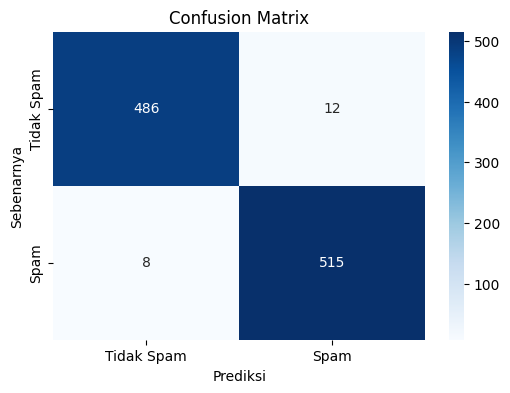

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# evaluasi data train resampled
accuracy = accuracy_score(df_train['Spam'], df_train['Predicted']) #mengubah dari train menjadi train_resampled
print("Akurasi Model:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(df_train['Spam'], df_train['Predicted'])) #mengubah dari train menjadi train_resampled

# Confusion Matrix data train
cm = confusion_matrix(df_train['Spam'], df_train['Predicted']) #mengubah dari train menjadi train_resampled
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Spam', 'Spam'], yticklabels=['Tidak Spam', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

testnih['Predicted'] = testnih['Message'].apply(predict_naive_bayes)
df_test = testnih[['Message', 'Spam', 'Predicted']]
df_test

<ipython-input-169-4a12fb151e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testnih['Predicted'] = testnih['Message'].apply(predict_naive_bayes)


,Message,Spam,Predicted
1021,win urgent mobile number awarded prize guarant...,1,1
1022,sorry dude dont know forgot even dan reminded ...,0,0
1023,new voicemail please call,1,1
1024,free ringtone waiting collected simply text pa...,1,1
1025,today voda number ending selected receive rewa...,1,1
...,...,...,...
1272,kate jackson rec center ish right,0,0
1273,yes dont care need bad princess,0,0
1274,sorryin meeting ill call later,0,0
1275,thats cause old live high,0,0


Akurasi Model: 0.9609375
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       140
           1       0.96      0.96      0.96       116

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256



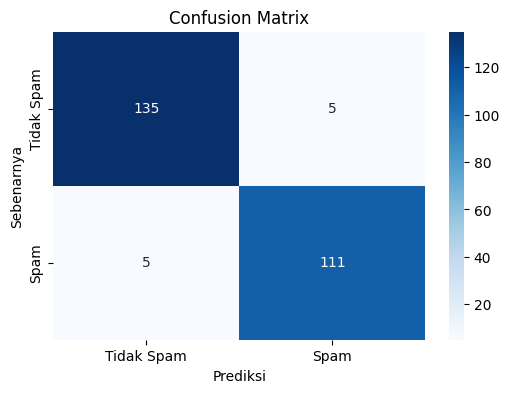

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


accuracy = accuracy_score(df_test['Spam'], df_test['Predicted'])
print("Akurasi Model:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(df_test['Spam'], df_test['Predicted']))

cm = confusion_matrix(df_test['Spam'],df_test['Predicted'])

# Menampilkan confusion matrix dengan seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Spam', 'Spam'], yticklabels=['Tidak Spam', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


# EDA Phising

In [ ]:
d2['Phishing'].value_counts()

,count
Phishing,
0.0,11119
1.0,6969
-1.0,9


In [ ]:
import pandas as pd

kondisi = d2['Phishing'] != -1.0

d2 = d2[kondisi]

print("Jumlah baris di d2_bersih setelah menghapus -1:", len(d2))
print("Nilai yang unik pada kolom phishing :", d2['Phishing'].unique())
print(d2['Phishing'].value_counts())


Jumlah baris di d2_bersih setelah menghapus -1: 18088
Nilai yang unik pada kolom phishing : [0. 1.]
Phishing
0.0    11119
1.0     6969
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.utils import resample

data_phishing = d2[d2['Phishing'] == 1]
data_safe = d2[d2['Phishing'] == 0]

jumlah_data_phishing = len(data_phishing)

data_safe_under = resample(data_safe,
                           replace=False,
                           n_samples=jumlah_data_phishing,
                           random_state=42)

d2_undersampled = pd.concat([data_phishing, data_safe_under], ignore_index=True)

d2_undersampled = d2_undersampled.dropna(subset=['Message'])
d2_undersampled = d2_undersampled[d2_undersampled['Message'] != '']

print("Jumlah data sebelum undersampling:", len(d2))
print("Jumlah data setelah undersampling:", len(d2_undersampled))
print("Jumlah data Phishing:", len(d2_undersampled[d2_undersampled['Phishing'] == 1]))
print("Jumlah data Safe:", len(d2_undersampled[d2_undersampled['Phishing'] == 0]))

d2_undersampled = d2_undersampled[['Message', 'Phishing']]
print(d2_undersampled[['Message', 'Phishing']])

Jumlah data sebelum undersampling: 18088
Jumlah data setelah undersampling: 13938
Jumlah data Phishing: 6969
Jumlah data Safe: 6969
                                                 Message  Phishing
0      hello hot little horny toy one dream open mind...       1.0
1      software incredibly low price lower drapery se...       1.0
2      entourage stockmogul newsletter ralph velez ge...       1.0
3      owe lot money dear applicant review upon recei...       1.0
4      make beg give everynight please partner much b...       1.0
...                                                  ...       ...
13933  order internet training please see note maggie...       0.0
13934  sap security mailbox functional technical diff...       0.0
13935  upon time mark wrote hiya always seem get erro...       0.0
13936  ew tax department update attached summary many...       0.0
13937  california update pm dwr filed comment califor...       0.0

[13938 rows x 2 columns]


In [ ]:
d2_undersampled['Phishing'].value_counts()

,count
Phishing,
1.0,6969
0.0,6969


In [ ]:
import random
import random
d2_undersampled_shuffled = d2_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Tentukan indeks untuk split
split_index = int(0.8 * len(d2_undersampled_shuffled))

# Split dataset menjadi train dan test
trainih= d2.iloc[:split_index]
testnih = d2_undersampled.iloc[split_index:]
print("Jumlah data train:", len(trainih))
print("Jumlah data test:", len(testnih))


Jumlah data train: 11150
Jumlah data test: 2788


In [ ]:
Phishing_messages = d2_undersampled_shuffled[d2_undersampled_shuffled['Phishing'] == 1]['Message']
Safe_messages = d2_undersampled_shuffled[d2_undersampled_shuffled['Phishing'] == 0]['Message']
print("Jumlah pesan Phishing:", len(Phishing_messages))
print("Jumlah pesan Safe:", len(Safe_messages))

Jumlah pesan Phishing: 6969
Jumlah pesan Safe: 6969


In [ ]:
from collections import defaultdict
Safe_word_counts = defaultdict(int)
Phishing_word_counts = defaultdict(int)

total_Phishing_words = 0
total_Safe_words = 0

for message in Phishing_messages:
    for word in message.split():
        Phishing_word_counts[word] += 1
        total_Phishing_words += 1

for message in Safe_messages:
    for word in message.split():
        Safe_word_counts[word] += 1
        total_Safe_words += 1
print("Kata dalam Spam:", dict(Phishing_word_counts))
print("Kata dalam Ham:", dict(Safe_word_counts))
print("Total Kata Spam:", total_Phishing_words)
print("Total Kata Ham:", total_Safe_words)

Kata dalam Spam: {'fail': 45, 'empty': 45, 'usref': 2, 'team': 324, 'subject': 1086, 'final': 157, 'information': 3870, 'customer': 1198, 'app': 11, 'issued': 105, 'via': 563, 'e': 3418, 'mail': 2737, 'wed': 44, 'jan': 129, 'recently': 222, 'received': 1088, 'moortgaage': 1, 'appproved': 2, 'request': 594, 'pending': 74, 'unfortunately': 51, 'able': 494, 'reach': 302, 'phone': 1274, 'please': 3857, 'verify': 133, 'detail': 581, 'http': 3129, 'www': 1972, 'kyqdv': 1, 'com': 3976, 'try': 522, 'call': 1317, 'thank': 697, 'guillermo': 3, 'akers': 4, 'msfjt': 1, 'digital': 208, 'authoring': 3, 'tool': 375, 'free': 4329, 'software': 2103, 'alert': 194, 'limited': 653, 'time': 3607, 'offer': 2338, 'downloadmore': 1, 'infosamplesunsubscribe': 1, 'download': 520, 'mirror': 14, 'site': 2266, 'sample': 195, 'unsubscribe': 637, 'help': 1234, 'create': 248, 'professional': 994, 'pageturning': 3, 'slideshow': 1, 'style': 249, 'brochure': 49, 'document': 299, 'book': 405, 'catalog': 58, 'invitation':

In [ ]:
vocabulary = set(" ".join(d1_undersampled['Message']).split())
vocab_size = len(vocabulary)


prior probability

In [ ]:
p_phishing_train = len(Phishing_messages) / len(trainih)
p_safe_train= len(Safe_messages) / len(trainih) #prior probability
print("Prior Probability Spam:", p_spam_train)
print("Prior Probability Ham:", p_ham_train)

Prior Probability Spam: 0.6258570029382958
Prior Probability Ham: 0.6248775710088149


In [ ]:

def calculate_word_probabilities(word_counts, total_words, vocab_size):
    probabilities = {}
    for word in vocabulary:
        probabilities[word] = (word_counts[word] + 1) / (total_words + vocab_size)  # Laplace smoothing
    return probabilities
Phishing_word_probs = calculate_word_probabilities(Phishing_word_counts, total_Phishing_words, vocab_size) #conditional probability
Safe_word_probs= calculate_word_probabilities(Safe_word_counts, total_Safe_words, vocab_size)
print("Conditional Probability Spam:", Phishing_word_probs)
print("Conditional Probability Ham:", Safe_word_probs)


Conditional Probability Spam: {'free': 0.004222799999219806, 'gigolo': 9.752424940461446e-07, 'abuse': 0.00013945967664859868, 'bottle': 0.00019407325631518277, 'polyp': 9.752424940461446e-07, 'oh': 8.192036949987615e-05, 'situation': 0.00018529607386876746, 'aging': 0.00016481598149379844, 'ringtone': 9.752424940461446e-07, 'wwwsmsacuhmmross': 9.752424940461446e-07, 'nearer': 2.9257274821384337e-06, 'wwwdbuknet': 9.752424940461446e-07, 'thatscool': 9.752424940461446e-07, 'christmas': 4.583639722016879e-05, 'ppmsg': 9.752424940461446e-07, 'march': 0.0001657912239878446, 'kkwhen': 9.752424940461446e-07, 'bcmwcnxx': 9.752424940461446e-07, 'door': 0.0001862713163628136, 'nig': 3.900969976184579e-06, 'doin': 1.9504849880922893e-06, 'buddy': 2.0480092374969036e-05, 'unclaimed': 0.00010825191683912204, 'jamsterget': 9.752424940461446e-07, 'site': 0.00221087473400261, 'broke': 3.315824479756892e-05, 'exciting': 0.0001599397690235677, 'grateful': 1.5603879904738314e-05, 'studyn': 9.75242494046

In [ ]:
import numpy as np
def predict_naive_bayes(message):
    perkata = message.split()

    phishing_prob = np.log(p_spam_train)  #di log biarv mencegah underflow, dan prior probability yang sebelumnya, jadi harusnya p_spam_train
    safe_prob = np.log(p_ham_train)

    for kata in perkata:
        phishing_prob += np.log(Phishing_word_probs.get(kata, 1 / (total_Phishing_words + vocab_size))) #p (word |spam), jika tidak ada maka menggunakan laplace smoothing
        safe_prob += np.log(Safe_word_probs.get(kata, 1 / (total_Safe_words + vocab_size)))

        #Jika spam_prob1 lebih besar dari ham_prob1, maka email tersebut diprediksi sebagai spam (return 1).
        #Jika spam_prob1 lebih besar" artinya nilai akhir (setelah log probabilitas dari semua kata ditambahkan)
         #dari spam_prob1 lebih besar daripada nilai akhir dari ham_prob1.
        #Ini menunjukkan bahwa model kita lebih yakin bahwa email tersebut adalah spam.


    return 1 if phishing_prob > safe_prob else 0

trainih['Predicted'] = trainih['Message'].apply(predict_naive_bayes)
df_train2 = trainih[['Message', 'Phishing', 'Predicted']]
df_train2

<ipython-input-181-bd97da7f1ded>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainih['Predicted'] = trainih['Message'].apply(predict_naive_bayes)


,Message,Phishing,Predicted
0,discount uniformitarianism sex lang dick hudso...,0.0,1
1,side galicismos galicismo spanish term name im...,0.0,0
2,equistar deal ticket still available assist ro...,0.0,0
3,hello hot little horny toy one dream open mind...,1.0,1
4,software incredibly low price lower drapery se...,1.0,1
...,...,...,...
13543,joseph barrera iii writes let say youre behind...,0.0,1
13544,fw product name fyi copy email sent pat donnel...,0.0,1
13545,mon aug geege wrote latest rambus memory plus ...,0.0,0
13546,ilug month pc spam please read dear opportunit...,1.0,1


Akurasi Model: 0.7130044843049327
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.99      0.54      0.70      6847
         1.0       0.57      0.99      0.73      4303

    accuracy                           0.71     11150
   macro avg       0.78      0.76      0.71     11150
weighted avg       0.83      0.71      0.71     11150



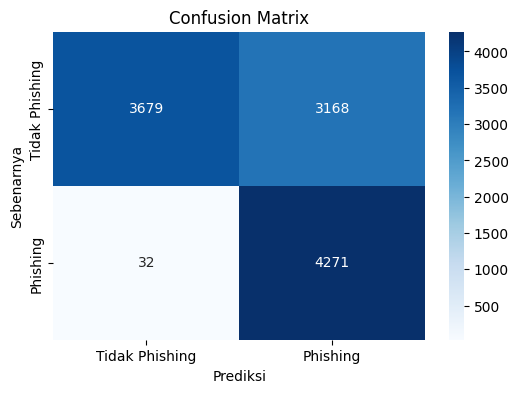

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# evaluasi data train resampled
accuracy = accuracy_score(df_train2['Phishing'], df_train2['Predicted']) #mengubah dari train menjadi train_resampled
print("Akurasi Model:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(df_train2['Phishing'], df_train2['Predicted'])) #mengubah dari train menjadi train_resampled

# Confusion Matrix data train
cm = confusion_matrix(df_train2['Phishing'], df_train2['Predicted']) #mengubah dari train menjadi train_resampled
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Phishing', 'Phishing'], yticklabels=['Tidak Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

testnih['Predicted'] = testnih['Message'].apply(predict_naive_bayes)
df_test2 = testnih[['Message', 'Phishing', 'Predicted']]
df_test2

<ipython-input-183-fa1eff26b3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testnih['Predicted'] = testnih['Message'].apply(predict_naive_bayes)


,Message,Phishing,Predicted
11150,intraday eastrans nomination change nomination...,0.0,1
11151,energy book chris problem feel free mention na...,0.0,0
11152,question hi louise hope well trip london went ...,0.0,0
11153,mon oct bitbitchmagnesiumnet wroteim truly stu...,0.0,1
11154,deseret language linguistic society call paper...,0.0,1
...,...,...,...
13933,order internet training please see note maggie...,0.0,0
13934,sap security mailbox functional technical diff...,0.0,1
13935,upon time mark wrote hiya always seem get erro...,0.0,1
13936,ew tax department update attached summary many...,0.0,1


*italicized text*

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Akurasi Model: 0.5390961262553802
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      2788
         1.0       0.00      0.00      0.00         0

    accuracy                           0.54      2788
   macro avg       0.50      0.27      0.35      2788
weighted avg       1.00      0.54      0.70      2788



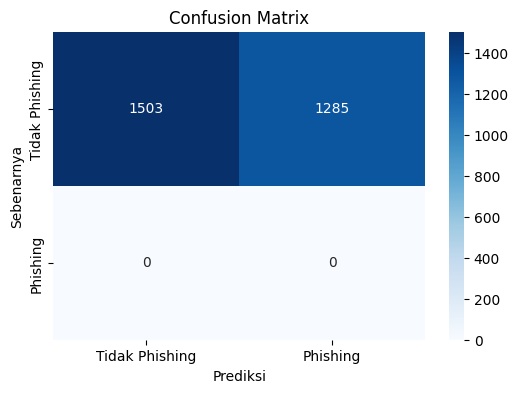

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


accuracy = accuracy_score(df_test2['Phishing'], df_test2['Predicted'])
print("Akurasi Model:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(df_test2['Phishing'], df_test2['Predicted']))

cm = confusion_matrix(df_test2['Phishing'],df_test2['Predicted'])

# Menampilkan confusion matrix dengan seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Phishing', 'Phishing'], yticklabels=['Tidak Phishing', 'Phishing'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()
